In [1]:
#### Dependencies
import os
import matplotlib.pyplot as plt
import urllib
from urllib.request import urlopen
import json
import csv
# import simplejson
import pandas as pd
# import pytest
import base64
import sys
import glob
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO
from bs4 import BeautifulSoup
import requests
from pprint import pprint
from ohmysportsfeedspy.v1_0 import API_v1_0
from ohmysportsfeedspy.v1_1 import API_v1_1
from ohmysportsfeedspy.v1_2 import API_v1_2
from ohmysportsfeedspy import MySportsFeeds
msf = MySportsFeeds(version="1.2")
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [2]:
#Top 5 Teams Bar Chart
overall = "NFL_Standings/Overall/Overall_Standings_Combined.csv"
overall = pd.read_csv(overall)
overall.drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1, inplace=True)
overall.set_index("Season")
overall.head(1)
#Team Overall Standings/Stats by Season
# overall[["Season", "#Team Abbr."]]
# overall.groupby(x.index).sum()
# team = overall.groupby(["Season","#Team Abbr.", "#Rank", "#Wins", "#Losses"]).sum()
# list(conference.columns.values)
# team
# sptTotals = team[["#KB", "#KrRet", "#KrYds", "#KrAvg", "#KrLng","#KrTD", 
#                         "#Kr20Plus", "#Kr40Plus", "#KrFC", "#KrFum", "#PrRet", 
#                         "#PrYds", "#PrAvg", "#PrLng", "#PrTD", "#Pr20Plus", 
#                         "#Pr40Plus", "#PrFC", "#PrFum", "#FgBlk", "#FgMade", 
#                         "#FgAtt","#FgPct", "#FgMade1_19", "#FgAtt1_19", "#Fg1_19Pct",
#                         "#FgMade20_29", "#FgAtt20_29", "#Fg20_29Pct", "#FgMade30_39", "#FgAtt30_39",
#                         "#Fg30_39Pct","#FgMade40_49", "#FgAtt40_49", "#Fg40_49Pct", "#FgMade50Plus", "#FgAtt50Plus",
#                         "#Fg50PlusPct", "#FgLng", "#XpBlk", "#XpMade", "#XpAtt", 
#                         "#XpPct", "#FgAndXpPts", "#KoPct", "#Kickoffs", "#KoYds",
#                         "#KoOOB", '#KoAvg', "#KoTB", "#KoRet", "#KoRetYds", 
#                         "#KoRetAvgYds", "#KoTD", "#KoOS", "#KoOSR", "#Punts", 
#                         "#PuntYds", "#PuntNetYds", "#PuntLng", "#PuntAvg", "#PuntNetAvg", 
#                         "#PuntBlk", "#PuntOOB", "#PuntDown", "#PuntIn20", "#PuntIn20Pct", 
#                         "#PuntTB", "#PuntTBPct", "#PuntFC", "#PuntRet", "#PuntRetYds", "#PuntRetAvg"
# ]]
# sptTotals.head()
offTotals = overall[["#PassAttempts", "#PassCompletions", "#PassPct", "#PassAttemptsPerGame", 
                        "#PassGrossYards", "#PassNetYards", "#PassYardsPerAtt", "#PassYardsPerGame", "#PassTD", "#PassTDPct", 
                        "#PassInt", "#PassIntPct", "#PassLng", "#PassAvg", "#Pass20Plus", 
                        "#Pass40Plus", "#PassSacks", "#PassSackY", "#QBRating", "#RushAttempts", 
                        "#RushAttemptsPerGame", "#RushYards", "#RushAverage", "#RushYardsPerGame", "#RushTD", 
                        "#RushLng", "#Rush1stDowns", "#Rush1stDownsPct", "#Rush20Plus", "#Rush40Plus", 
                        "#RushFumbles", "#Receptions", "#RecYards", "#RecAverage", 
                        "#RecYardsPerGame", "#RecTD", "#RecLng", "#Rec1stDowns", "#Rec20Plus", 
                        "#Rec40Plus", "#RecFumbles"
                       ]]
offTotals.head()
# defTotals = team[["#TackleSolo", "#TackleTotal", "#TackleAst", "#Sacks", "#SackYds", 
#                         "#TacklesForLoss", "#Interceptions", "#IntTD", "#IntYds", "#IntAverage", 
#                         "#IntLng", "#PassesDefended", "#Stuffs", "#Safeties", "#StuffYds",
#                         "#Fumbles", "#FumLost", "#FumForced", "#FumOwnRec", "#FumOppRec", 
#                         "#FumRecYds", "#FumTotalRec", "#FumTD"
# ]]
# defTotals.head()

,#PassAttempts,#PassCompletions,#PassPct,#PassAttemptsPerGame,#PassGrossYards,#PassNetYards,#PassYardsPerAtt,#PassYardsPerGame,#PassTD,#PassTDPct,#PassInt,#PassIntPct,#PassLng,#PassAvg,#Pass20Plus,#Pass40Plus,#PassSacks,#PassSackY,#QBRating,#RushAttempts,#RushAttemptsPerGame,#RushYards,#RushAverage,#RushYardsPerGame,#RushTD,#RushLng,#Rush1stDowns,#Rush1stDownsPct,#Rush20Plus,#Rush40Plus,#RushFumbles,#Receptions,#RecYards,#RecAverage,#RecYardsPerGame,#RecTD,#RecLng,#Rec1stDowns,#Rec20Plus,#Rec40Plus,#RecFumbles
0,473,328,69.3,29.6,4033,3802,7.6,237.6,37,7.8,9,1.9,708,8.5,57,12,30,231,113.5,505,31.6,2394,4.7,149.6,16,464,107,21.2,19,5,7,328,4033,12.3,252.1,37,708,206,42,12,0
1,609,399,65.5,38.1,4793,4672,7.5,292.0,40,6.6,15,2.5,707,7.9,67,11,17,121,101.1,438,27.4,1800,4.1,112.5,15,343,98,22.4,13,1,6,399,4793,12.0,299.6,40,707,227,56,11,0
2,551,349,63.3,34.4,4468,4281,7.4,267.6,38,6.9,6,1.1,750,8.1,60,15,30,187,107.1,440,27.5,1997,4.5,124.8,14,359,106,24.1,12,2,7,349,4468,12.8,279.2,38,750,223,45,15,0
3,459,287,62.5,28.7,3521,3246,6.4,202.9,20,4.4,6,1.3,696,7.7,55,9,45,275,95.2,524,32.8,2824,5.4,176.5,20,515,146,27.9,17,6,9,287,3521,12.3,220.1,20,696,161,46,9,0
4,627,392,62.5,39.2,4357,4180,6.4,261.2,34,5.4,9,1.4,598,7.0,49,9,27,177,95.2,439,27.4,1752,4.0,109.5,13,322,100,22.8,8,1,0,392,4357,11.1,272.3,34,598,228,39,8,0


# Offensive Plots

In [23]:
#Y values for all Offensive Categories
team_df1 = overall.groupby(["#Team Abbr."]).sum()
# list(conference.columns.values)
team_df2 = overall
# team_df1.join(team_df2, on="Season", how="left")
del team_df1["#Team ID"]
del team_df1["#Rank"]
wins = team_df1.nlargest(5, "#Wins")
x1 = wins["#Wins"]
x1 = pd.DataFrame(x1)
#Passing
ypAtt = wins["#PassAttempts"]
ypAtt = pd.DataFrame(ypAtt)
ypCom = wins["#PassCompletions"]
ypCom = pd.DataFrame(ypCom)
ypPct = wins["#PassPct"]
ypPct = pd.DataFrame(ypPct)
ypAPG = wins["#PassAttemptsPerGame"]
ypAPG = pd.DataFrame(ypAPG)
ypGY = wins["#PassGrossYards"]
ypGY = pd.DataFrame(ypGY)
ypNY = wins["#PassNetYards"]
ypNY = pd.DataFrame(ypNY)
ypYPA = wins["#PassYardsPerAtt"]
ypYPA = pd.DataFrame(ypYPA)
ypYPG = wins["#PassYardsPerGame"]
ypYPG = pd.DataFrame(ypYPG)
ypTD = wins["#PassTD"]
ypTD = pd.DataFrame(ypTD)
ypTDPct = wins["#PassTDPct"]
ypTDPct = pd.DataFrame(ypTDPct)
ypInt = wins["#PassInt"]
ypInt = pd.DataFrame(ypInt)
ypIntPct = wins["#PassIntPct"]
ypIntPct = pd.DataFrame(ypIntPct)
ypLng = wins["#PassLng"]
ypLng = pd.DataFrame(ypLng)
ypAvg = wins["#PassAvg"]
ypAvg = pd.DataFrame(ypAvg)
yp20 = wins["#Pass20Plus"]
yp20 = pd.DataFrame(yp20)
yp40 = wins["#Pass40Plus"]
yp40 = pd.DataFrame(yp40)
ypSack = wins["#PassSacks"]
ypSack = pd.DataFrame(ypSack)
ypSackY = wins["#PassSackY"]
ypSackY = pd.DataFrame(ypSackY)
ypQBR = wins["#QBRating"]
ypQBR = pd.DataFrame(ypQBR)

#Rushing
yRAtt = wins["#RushAttempts"]
yRAtt = pd.DataFrame(yRAtt)
yRAPG = wins["#RushAttemptsPerGame"]
yRAPG = pd.DataFrame(yRAPG)
yRYds = wins["#RushYards"]
yRYds = pd.DataFrame(yRYds)
yRAvg = wins["#RushAverage"]
yRAvg = pd.DataFrame(yRAvg)
yRYPG = wins["#RushYardsPerGame"]
yRYPG = pd.DataFrame(yRYPG)
yRTD = wins["#RushTD"]
yRTD = pd.DataFrame(yRTD)
yRLng = wins["#RushLng"]
yRLng = pd.DataFrame(yRLng)
yR1st = wins["#Rush1stDowns"]
yR1st = pd.DataFrame(yR1st)
yR1Pct = wins["#Rush1stDownsPct"]
yR1Pct = pd.DataFrame(yR1Pct)
yR20 = wins["#Rush20Plus"]
yR20 = pd.DataFrame(yR20)
yR40 = wins["#Rush40Plus"]
yR40 = pd.DataFrame(yR40)
yRFmb = wins["#RushFumbles"]

#Receiving
yRFmb = pd.DataFrame(yRFmb)
ypRec = wins["#Receptions"]
ypRec = pd.DataFrame(ypRec)
ypRYds = wins["#RecYards"]
ypRYds = pd.DataFrame(ypRYds)
ypRAvg = wins["#RecAverage"]
ypRAvg = pd.DataFrame(ypRAvg)
ypRYPG = wins["#RecYardsPerGame"]
ypRYPG = pd.DataFrame(ypRYPG)
ypRecTD = wins["#RecTD"]
ypRecTD = pd.DataFrame(ypRecTD)
ypRecLng = wins["#RecLng"]
ypRecLng = pd.DataFrame(ypRecLng)
ypRec1st = wins["#Rec1stDowns"]
ypRec1st = pd.DataFrame(ypRec1st)
ypRec20 = wins["#Rec20Plus"]
ypRec20 = pd.DataFrame(ypRec20)
ypRec40 = wins["#Rec40Plus"]
ypRec40 = pd.DataFrame(ypRec40)
ypRecFmb = wins["#RecFumbles"]
ypRecFmb = pd.DataFrame(ypRecFmb)

### Passing Plots

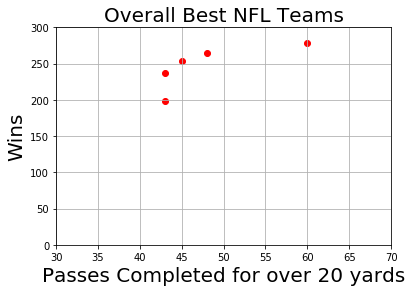

In [20]:
#First Plot, showing Passes over 20 yards

plt.scatter(x1["#Wins"],
        yp20["#Pass20Plus"], marker="o", facecolors="red")
plt.title("Overall Best NFL Teams", fontsize=20)
plt.ylabel("Wins", fontsize=20)
plt.ylim(0,300)
plt.xlabel("Passes Completed for over 20 yards", fontsize=20)
plt.xlim(30,70)
plt.grid(True)
plt.figure(figsize=(10,10), dpi=80)
# plt.rcParams["figure.figsize"] = (5,5)
# team_df1.plot(figsize=(30, 15))
# plt.savefig("WeatherPyGraphs/LatitudeVsTemperature.png")
plt.show()

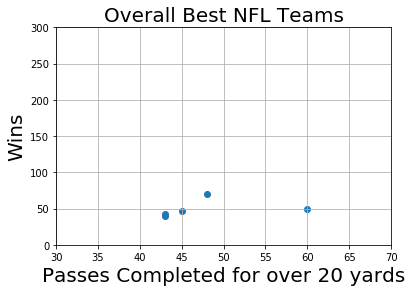

In [10]:
#First Plot, showing Passes over 40 yards

plt.scatter(x1["#Wins"],
        yp40["#Pass40Plus"])
plt.title("Overall Best NFL Teams", fontsize=20)
plt.ylabel("Wins", fontsize=20)
plt.ylim(0,300)
plt.xlabel("Passes Completed for over 20 yards", fontsize=20)
plt.xlim(30,70)
plt.grid(True)
plt.figure(figsize=(10,10), dpi=80)
# plt.rcParams["figure.figsize"] = (5,5)
# team_df1.plot(figsize=(30, 15))
# plt.savefig("WeatherPyGraphs/LatitudeVsTemperature.png")
plt.show()

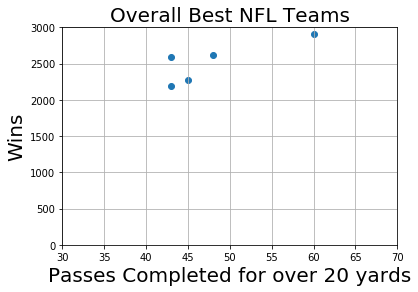

In [17]:
#First Plot, showing Passes over 60 yards

plt.scatter(x1["#Wins"],
        ypAtt["#PassAttempts"])
plt.title("Overall Best NFL Teams", fontsize=20)
plt.ylabel("Wins", fontsize=20)
plt.ylim(0,3000)
plt.xlabel("Passes Completed for over 20 yards", fontsize=20)
plt.xlim(30,70)
plt.grid(True)
plt.figure(figsize=(10,10), dpi=80)
# plt.rcParams["figure.figsize"] = (5,5)
# team_df1.plot(figsize=(30, 15))
# plt.savefig("WeatherPyGraphs/LatitudeVsTemperature.png")
plt.show()

### Rushing Plots

### Scoring Plots

### Turnover Plots

# Defensive Plots

### Pass Def Plots

### Rush Def Plots

### Scoring Def Plots

### Def Turnover Plots

# Special Teams Plots

### XP/FG Plots

### Punt Plots

### Kickoff Plots

### PR Plots

### KOR Plots